In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Analyzing the data

In [31]:
stores_train = pd.read_csv('data/stores_train.csv')

# finner antall nan verdier
from pandas.api.types import is_string_dtype, is_numeric_dtype
stores_train.info()
stores_train.shape
print(stores_train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             12859 non-null  object 
 1   year                 12859 non-null  int64  
 2   store_name           12859 non-null  object 
 3   plaace_hierarchy_id  12859 non-null  object 
 4   sales_channel_name   12859 non-null  object 
 5   grunnkrets_id        12859 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  12859 non-null  float64
 8   lon                  12859 non-null  float64
 9   chain_name           3737 non-null   object 
 10  mall_name            2280 non-null   object 
 11  revenue              12859 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB
          year  grunnkrets_id           lat           lon       revenue
count  12859.0   1.285900e+04  12859.000000  12859.000000

In [33]:
# gjør chain_name og mall_name sine nan verdier til 0
stores_train['chain_name'] = stores_train['chain_name'].replace(np.nan, 0)
stores_train['mall_name'] = stores_train['mall_name'].replace(np.nan, 0)
stores_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             12859 non-null  object 
 1   year                 12859 non-null  int64  
 2   store_name           12859 non-null  object 
 3   plaace_hierarchy_id  12859 non-null  object 
 4   sales_channel_name   12859 non-null  object 
 5   grunnkrets_id        12859 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  12859 non-null  float64
 8   lon                  12859 non-null  float64
 9   chain_name           12859 non-null  object 
 10  mall_name            12859 non-null  object 
 11  revenue              12859 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [44]:
# deletes the rows with null-addresses (now number of rows is number of addresses) 

stores_train = stores_train[stores_train['address'].notna()]
stores_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11085 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             11085 non-null  object 
 1   year                 11085 non-null  int64  
 2   store_name           11085 non-null  object 
 3   plaace_hierarchy_id  11085 non-null  object 
 4   sales_channel_name   11085 non-null  object 
 5   grunnkrets_id        11085 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  11085 non-null  float64
 8   lon                  11085 non-null  float64
 9   chain_name           11085 non-null  object 
 10  mall_name            11085 non-null  object 
 11  revenue              11085 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [38]:
# look at min, max and mean and see if there are any outliers. there are some at lon (max is very large)
print(stores_train.describe())

          year  grunnkrets_id           lat           lon       revenue
count  11085.0   1.108500e+04  11085.000000  11085.000000  11085.000000
mean    2016.0   8.951838e+06     61.079721     10.054947      8.316465
std        0.0   5.748925e+06      2.938747      3.741125     15.782287
min     2016.0   1.010105e+06     57.994443      4.713076      0.000000
25%     2016.0   3.013402e+06     59.407656      7.781075      1.182000
50%     2016.0   8.140401e+06     59.925664     10.436361      3.377000
75%     2016.0   1.247040e+07     61.272951     10.846408      8.011000
max     2016.0   2.030031e+07     71.040213     31.111746    219.599000


<AxesSubplot:>

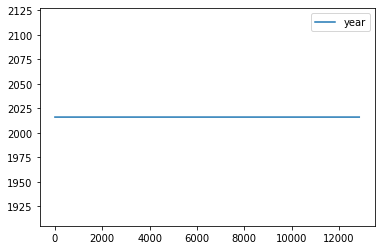

In [68]:
stores_train.plot.line(y="year")


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

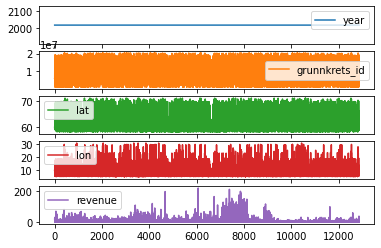

In [69]:
stores_train.plot.line(subplots=True)

<AxesSubplot:>

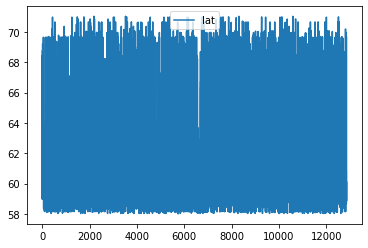

In [70]:
stores_train.plot.line(y="lat")

In [ ]:
stores_train.plot.line(y="lon")

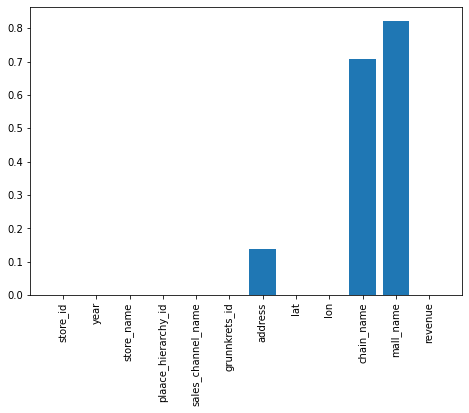

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
horisontal = stores_train.isna().mean().index
vertical = stores_train.isna().mean().values

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()

#Mabye smart to use rows with no NaN values?

In [8]:
sales_channel_names = list(dict.fromkeys(stores_train.sales_channel_name.values))
#print(sales_channel_names)
instances = {i:list(stores_train.sales_channel_name.values).count(i) for i in stores_train.sales_channel_name.values}
#print(instances)
#print(stores_train.revenue)

revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for sales_channel_name in sales_channel_names: #Find revenue for every channel name
    for i in range(len(stores_train.revenue)):
        if stores_train.sales_channel_name.values[i] == sales_channel_name:
            revenue_per_channel_name[sales_channel_name] += stores_train.revenue[i]

#print(revenue_per_channel_name)

mean_revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for key in revenue_per_channel_name.keys(): #Find mean revenue for every channel name
    mean_revenue_per_channel_name[key] = revenue_per_channel_name[key] / instances[key]

#print(mean_revenue_per_channel_name)



{'Hamburger restaurants': 10.341043478260872, 'Sushi and wok restaurants': 7.033237113402063, 'Thai restaurants': 4.005233333333334, 'Chinese restaurants': 3.7655454545454545, 'Pizza restaurants': 5.4326742857142865, 'Eateries': 7.2853484848484875, 'Restaurants': 8.286564999999998, 'Restaurants and cafes': 7.799164473684208, 'Belongs to dining': 3.2798439716312084, 'Hotels with restaurants': 4.710399159663868, 'Fast food': 3.9704572649572625, 'Bakeries': 4.4238, 'Bakery shop': 5.467893617021278, 'Coffee shops': 4.165760869565217, 'Cafes': 4.970258620689654, 'Bars': 2.9876, 'Pubs': 5.9606068376068375, 'Sandwich shops': 5.609000000000001, 'Ice cream and smoothie shops': 2.0205, 'Hardware store': 9.195072289156629, 'Paint dealers': 8.505560975609754, 'Kitchen design stores': 23.881884615384614, 'Plumbing stores': 9.462770270270267, 'Tile stores': 25.012684210526313, 'Construction stores': 12.817613402061847, 'Interior design shops': 4.346, 'Gas stations': 16.47803768115942, 'Car accessori

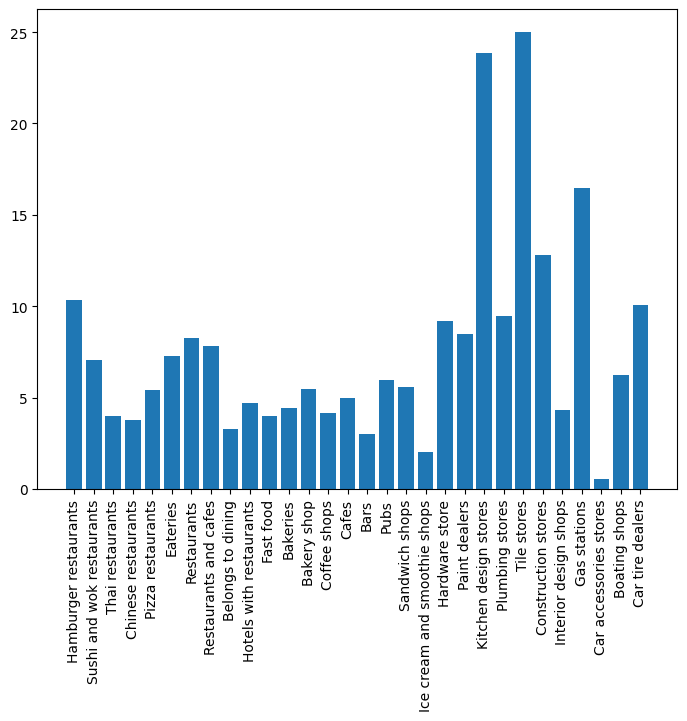

In [9]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])

#print(len(list(mean_revenue_per_channel_name.keys())))

vertical = list(mean_revenue_per_channel_name.values())[:30]
horisontal = list(mean_revenue_per_channel_name.keys())[:30]

#print(horisontal)
#print(vertical)

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()